# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.cov(X)
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.dot(u1.T, X)  # Projection into the firsr axis
Xi2 = np.dot(u2.T, X)  # Projection into the second axis

# Calculate the approximation of the original from new basis
X_approx = np.outer(u1, Xi1) + np.outer(u2, Xi2)

#print(Xi1[:,None]) # add second dimention to array and test it
print("covariance Matrix R:")
print(R)
print("\nNew basis Vectors:")
print("u1:", u1)
print("u2:", u2)
print("\nCoordinates of projected points:")
print("Xi1:", Xi1)
print("Xi2:", Xi2)

# Check that you got the original
print("\nApproximation of X from the new base:")
print(X_approx)


covariance Matrix R:
[[1.         2.        ]
 [2.         4.33333333]]

New basis Vectors:
u1: [-0.4241554  -0.90558942]
u2: [-0.90558942  0.4241554 ]

Coordinates of projected points:
Xi1: [-4.47066848 -3.14092366  0.        ]
Xi2: [-0.11455726  0.36687677  0.        ]

Approximation of X from the new base:
[[ 2.  1. -0.]
 [ 4.  3.  0.]]


# PCA on Iris data

In [3]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

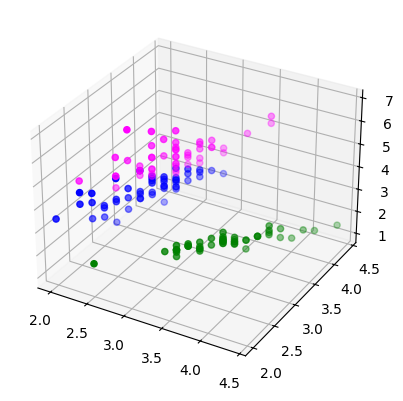

In [4]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

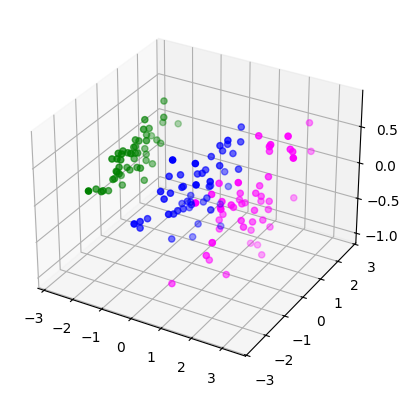

In [10]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  # Import PCA from sklearn.decomposition

Xscaler = StandardScaler()
#Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [11]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [12]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

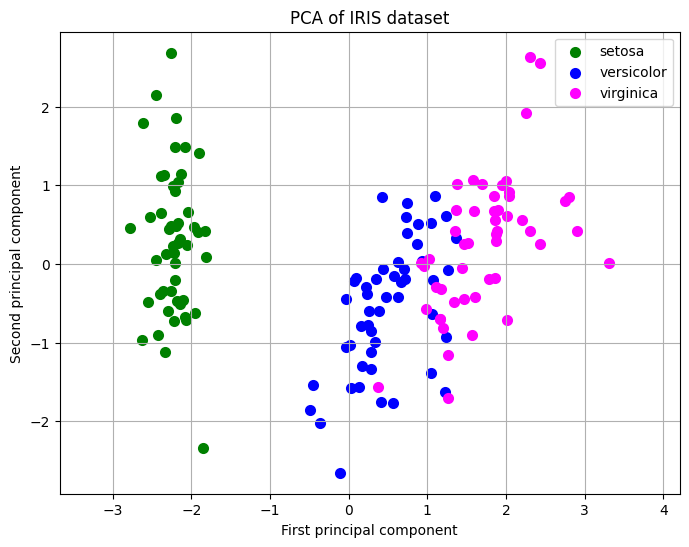

In [13]:
# Plot the principal components in 2D, mark different targets in color
# Pre-processing with StandardScaler
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Define PCA object (two components), fit and transform the data
# Since we're plotting in 2D, we use n_components=2
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

# Now plot the first two principal components in 2D
plt.figure(figsize=(8, 6))
colors = ['green', 'blue', 'magenta']

# Plot each class
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(Xpca[y == i, 0], Xpca[y == i, 1], color=color, lw=2, label=target_name)

plt.title('PCA of IRIS dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis('equal')
plt.grid(True)
plt.show()

# Xpp + KNN classifier

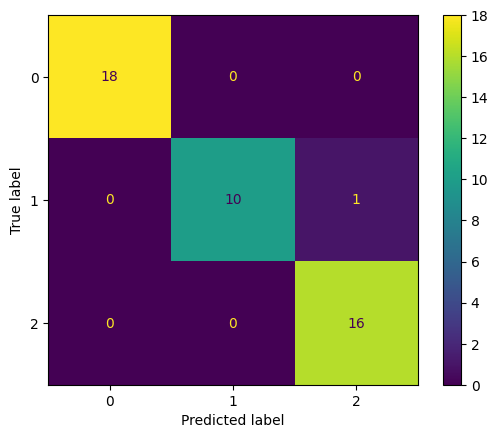

Classification report for classifier KNN with Xpp:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [30]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)

# Standardize the features (optional but recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier with 3 neighbors
knn1=KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier on the training data
knn1.fit(X_train, y_train)

# Predict the labels on the test data
Ypred = knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)
plt.show()

print("Classification report for classifier KNN with Xpp:")
print(classification_report(y_test, Ypred))


#2) Xpca + KNN

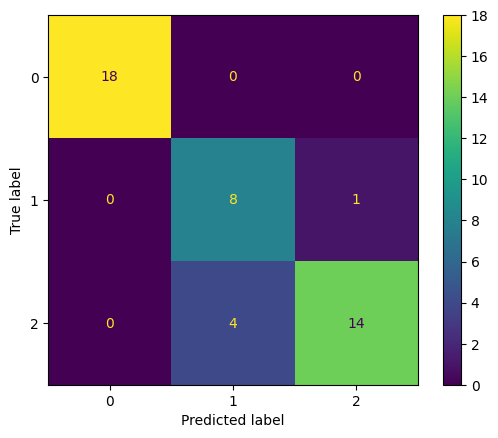

Classification report for classifier using the PCA-reduced dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.67      0.89      0.76         9
           2       0.93      0.78      0.85        18

    accuracy                           0.89        45
   macro avg       0.87      0.89      0.87        45
weighted avg       0.91      0.89      0.89        45



In [28]:
# Split the data into a training set and a test set
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca[:,:], y, test_size=0.3)

# Standardize the features (optional but recommended for KNN)
scaler = StandardScaler()
X_trainpca = scaler.fit_transform(X_trainpca)
X_testpca = scaler.transform(X_testpca)

# Initialize the KNN classifier with 3 neighbors
knn1=KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier on the training data
knn1.fit(X_trainpca, y_trainpca)

# Predict the labels on the test data
Ypredpca = knn1.predict(X_testpca)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_testpca, Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca, Ypredpca)
plt.show()

# Metrics for the classifier using the PCA-reduced dataset
print("Classification report for classifier using the PCA-reduced dataset:")
print(classification_report(y_testpca, Ypredpca))

#3) Xpca Removing the third feature + KNN

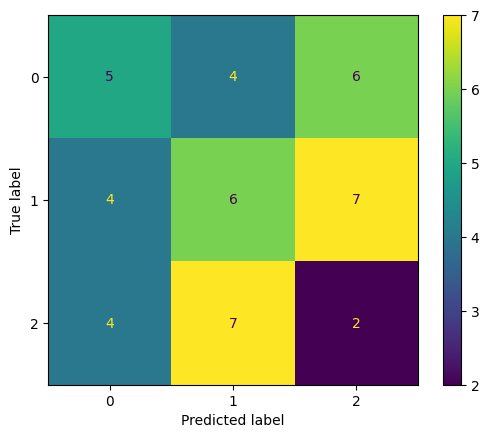

Classification report for classifier using the PCA (remove the 3rd feature) and KNN dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.71      0.83        17
           2       0.72      1.00      0.84        13

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.89        45
weighted avg       0.92      0.89      0.89        45



In [18]:
# Split the data into a training set and a test set
X_trainpca1, X_testpca1, y_trainpca1, y_testpca1 = train_test_split(Xpca[:,0:2], y, test_size=0.3)

# Standardize the features (optional but recommended for KNN)
scaler = StandardScaler()
X_trainpca1 = scaler.fit_transform(X_trainpca1)
X_testpca1 = scaler.transform(X_testpca1)

# Initialize the KNN classifier with 3 neighbors
knn1=KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier on the training data
knn1.fit(X_trainpca1, y_trainpca1)

# Predict the labels on the test data
Ypredpca1 = knn1.predict(X_testpca1)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_testpca1, Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca1, Ypredpca)
plt.show()

# Metrics for the classifier using the PCA-reduced dataset
print("Classification report for classifier using the PCA (remove the 3rd feature) and KNN dataset:")
print(classification_report(y_testpca1, Ypredpca1))

#Xpca Removing the first feature + KNN

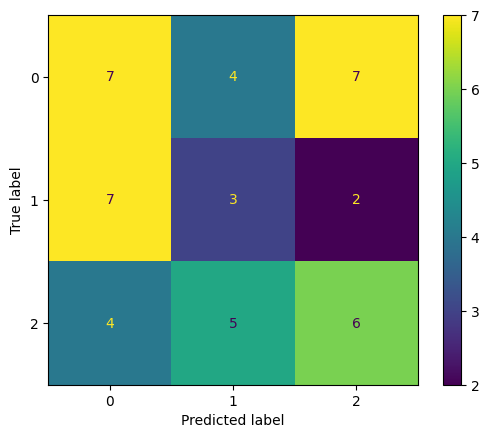

Classification report for classifier using the PCA (remove the 1rst feature) and KNN dataset:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        18
           1       0.47      0.58      0.52        12
           2       0.40      0.40      0.40        15

    accuracy                           0.49        45
   macro avg       0.49      0.49      0.49        45
weighted avg       0.50      0.49      0.49        45



In [31]:
# Split the data into a training set and a test set
X_trainpca1, X_testpca1, y_trainpca1, y_testpca1 = train_test_split(Xpca[:,1:3], y, test_size=0.3)

# Standardize the features (optional but recommended for KNN)
scaler = StandardScaler()
X_trainpca1 = scaler.fit_transform(X_trainpca1)
X_testpca1 = scaler.transform(X_testpca1)

# Initialize the KNN classifier with 3 neighbors
knn1=KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier on the training data
knn1.fit(X_trainpca1, y_trainpca1)

# Predict the labels on the test data
Ypredpca1 = knn1.predict(X_testpca1)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_testpca1, Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca1, Ypredpca)
plt.show()

# Metrics for the classifier using the PCA-reduced dataset
print("Classification report for classifier using the PCA (remove the 1rst feature) and KNN dataset:")
print(classification_report(y_testpca1, Ypredpca1))

To conclude, we compared different KNN classification methods on the Iris dataset, using both the original features and different variations of Principal Component Analysis (PCA).

The results show that the method using all four original features achieved the best performance with an accuracy of 98%, indicating that each feature contributes significantly to classification. PCA, by reducing the dimensions to two principal components, slightly decreased accuracy to 89%, suggesting a minor loss of information. Further removing specific principal components reduced performance even more, highlighting the importance of carefully selecting which components to retain.

In conclusion, while PCA is useful for dimensionality reduction, it should be applied cautiously to maintain classification efficiency.